# Title

**- A Walkthrough Example**

# Description

The aim of this HW is to let you do some analysis on your own with less structure.

# Dataset Description:
The dataset used here is the Wine data set (another commonly used sklearn dataset).  Use this to answer the questions embedded in the Notebook.

# Instructions:
1. Read the data.  
2. Do some explorations.
3. Fit some multiclass models.
4. Interpret these models.

# Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression()</a> : Generates a Logistic Regression classifier

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit" target="_blank">sklearn.fit()</a> : Fits the model to the given data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict" target="_blank">sklearn.predict()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform pure classification predictions

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba" target="_blank">sklearn.predict_proba()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform probability predictions of all the classes in the response (they should add up to 1 for each observation)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression.coef_ and .intercept_</a> : Pull off the estimated β coefficients in a Logistic Regression model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" target="_blank">sklearn.KNeighborsClassifier</a> : Fit a k-NN classification model


In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
#import sklearn.metrics as met

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

First Read in the data set and take a peak at it:

In [2]:
raw = datasets.load_wine()
X_full = pd.DataFrame(raw['data'],columns=raw['feature_names'])
y = raw['target']
print(X_full.shape,y.shape)

(178, 13) (178,)


In [3]:
X_full.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**Q1**: Perform a 70-30 `train_test_split` using `random_state=109` and `shuffle=True`.  Why is it important to shuffle here?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.3, random_state=109, shuffle=True)

Shuffling is important to ensure that the training and test sets are representative of the overall dataset. Without shuffling, the data might be split in a way that does not capture the variability of the dataset, leading to biased models.

**Q2**: Explore the data a little.  Visualize the marginal association (aka, bivariate relationship) of wine type to amount of alcohol, level of malic acid, and total level of phenols.  Which predictor seems to have the strongest association with the response?

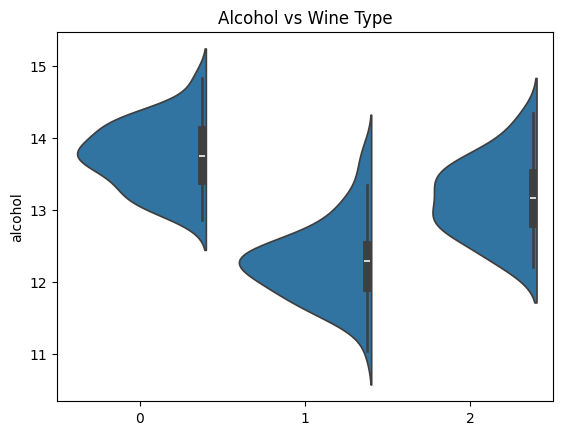

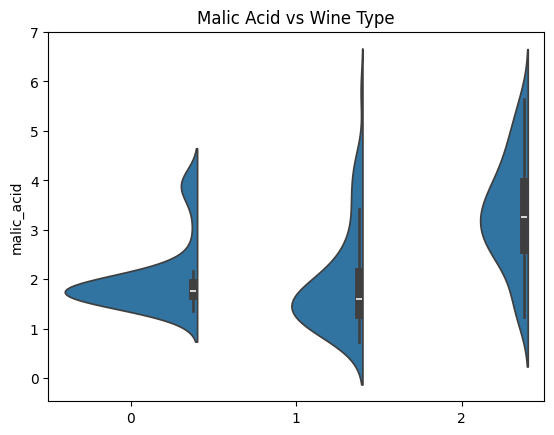

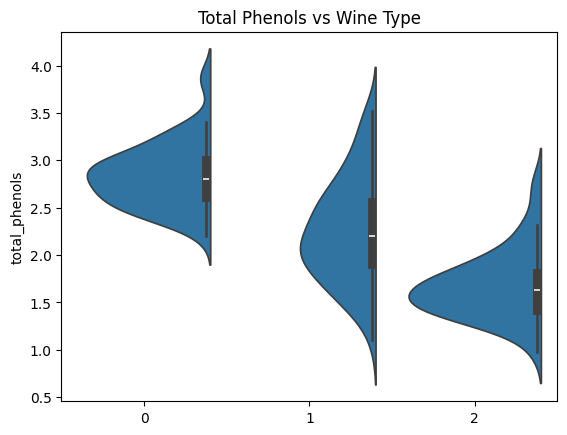

In [ ]:

sns.violinplot(y=X_full['alcohol'], x=y, split=True)
plt.title('Alcohol vs Wine Type')
plt.show()

sns.violinplot(y=X_full['malic_acid'], x=y, split=True)
plt.title('Malic Acid vs Wine Type')
plt.show()

sns.violinplot(y=X_full['total_phenols'], x=y, split=True)
plt.title('Total Phenols vs Wine Type')
plt.show()

Based on the violin plots, it appears that the amount of alcohol has the strongest association with the wine type.

**Q3**: Fit 3 different models with ['alcohol','malic_acid'] as the predictors: (1) a standard logistic regression to predict a binary indicator for class 0 (you'll have to crete it yourself), (2) a multinomial logistic regression to predict all 3 classes and (3) a OvR logistic reression to predict all 3 classes.  Compare the results

In [ ]:

y_train_binary = (y_train == 0).astype(int)

# Fit a standard logistic regression model
logit_binary = LogisticRegression().fit(X_train[['alcohol', 'malic_acid']], y_train_binary)

# Fit a multinomial logistic regression model
logit_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000).fit(X_train[['alcohol', 'malic_acid']], y_train)

# Fit an OvR logistic regression model
logit_ovr = LogisticRegression(multi_class='ovr', max_iter=1000).fit(X_train[['alcohol', 'malic_acid']], y_train)

print("Binary Logistic Regression Coefficients:")
print(logit_binary.intercept_)
print(logit_binary.coef_)

print("Multinomial Logistic Regression Coefficients:")
print(logit_multi.intercept_)
print(logit_multi.coef_)

print("OvR Logistic Regression Coefficients:")
print(logit_ovr.intercept_)
print(logit_ovr.coef_)

Binary Logistic Regression Coefficients:
[-32.84788769]
[[ 2.57523516 -0.92014084]]
Multinomial Logistic Regression Coefficients:
[-22.95409095  27.02791258  -4.07382164]
[[ 1.82859967 -0.49907742]
 [-2.00097426 -0.33001112]
 [ 0.17237458  0.82908854]]
OvR Logistic Regression Coefficients:
[-32.84788769  35.97670443  -9.60128508]
[[ 2.57523516 -0.92014084]
 [-2.67760517 -0.76443539]
 [ 0.41786161  1.24835895]]


C:\Users\cleon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\cleon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


The coefficients for the binary logistic regression model are different from those for the multinomial and OvR models. The multinomial and OvR models provide coefficients for each class, while the binary model only provides coefficients for the binary classification.

**Q4**: For the Multinomial model, use the estimated coefficients to calculate the predicted probabilties by hand.  Feel free to confirm with the `predict_proba` command.

In [ ]:

# Calculate predicted probabilities by hand
X_test_poly = PolynomialFeatures(degree=1, include_bias=True).fit_transform(X_test[['alcohol', 'malic_acid']])
logits = np.dot(X_test_poly, logit_multi.coef_.T) + logit_multi.intercept_
probs = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)

# Confirm with predict_proba
probs_sklearn = logit_multi.predict_proba(X_test[['alcohol', 'malic_acid']])

print("Predicted probabilities by hand:")
print(probs[:5])
print("Predicted probabilities by sklearn:")
print(probs_sklearn[:5])

*your answer here*

**Q5**: For the OvR model, use the `predict_proba()` to estimate the predicted probabilities in the test set, and manually use this to calculate the predicted classes.  Feel free to confirm with the `predict` command.

In [ ]:

# Estimate predicted probabilities using predict_proba
probs_ovr = logit_ovr.predict_proba(X_test[['alcohol', 'malic_acid']])

# Manually calculate the predicted classes
pred_classes_ovr = np.argmax(probs_ovr, axis=1)

# Confirm with predict
pred_classes_sklearn = logit_ovr.predict(X_test[['alcohol', 'malic_acid']])

print("Predicted classes manually:")
print(pred_classes_ovr[:5])
print("Predicted classes by sklearn:")
print(pred_classes_sklearn[:5])

**Q6**: How could you use the `predict_proba()` command and 'change the threshold' in the multiclass setting to affect predictive accuracies within each class?  Note: it is not as simple as changing a threshold because there is not threshold

In a multiclass setting, you can adjust the decision threshold for each class by modifying the predicted probabilities. For example, you could assign a higher probability threshold for a specific class to increase its precision at the cost of recall. This can be done by comparing the predicted probabilities to custom thresholds for each class instead of simply taking the class with the highest probability.

**Q7**: Compare the accuracies in both train and test for both the multinomial and OvR logistic regressions.  Which seems to be performing better?  Is there any evidence of overfitting?  How could this be corrected?

In [20]:
# Calculate accuracies for multinomial logistic regression
train_accuracy_multi = logit_multi.score(X_train[['alcohol', 'malic_acid']], y_train)
test_accuracy_multi = logit_multi.score(X_test[['alcohol', 'malic_acid']], y_test)

# Calculate accuracies for OvR logistic regression
train_accuracy_ovr = logit_ovr.score(X_train[['alcohol', 'malic_acid']], y_train)
test_accuracy_ovr = logit_ovr.score(X_test[['alcohol', 'malic_acid']], y_test)

print("Multinomial Logistic Regression Train Accuracy:", train_accuracy_multi)
print("Multinomial Logistic Regression Test Accuracy:", test_accuracy_multi)
print("OvR Logistic Regression Train Accuracy:", train_accuracy_ovr)
print("OvR Logistic Regression Test Accuracy:", test_accuracy_ovr)

Multinomial Logistic Regression Train Accuracy: 0.8064516129032258
Multinomial Logistic Regression Test Accuracy: 0.7037037037037037
OvR Logistic Regression Train Accuracy: 0.7903225806451613
OvR Logistic Regression Test Accuracy: 0.7222222222222222


If the train accuracy is significantly higher than the test accuracy, it may indicate overfitting. Regularization techniques such as L2 regularization can help to reduce overfitting by penalizing large coefficients.

**Q8**: Create the classification boundaries for the two multiclass logistic regression models above.  How do they compare?

C:\Users\cleon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\cleon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


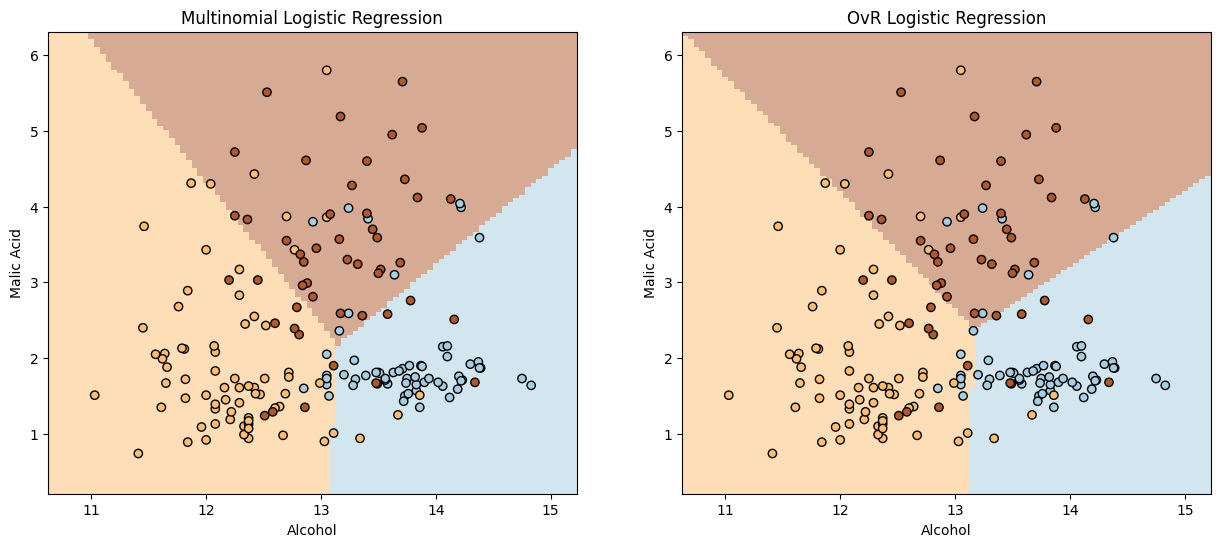

In [21]:
# Plot the decision boundary for multinomial logistic regression
x1_range = X_full['alcohol'].max() - X_full['alcohol'].min()
x2_range = X_full['malic_acid'].max() - X_full['malic_acid'].min()
x1_min, x1_max = X_full['alcohol'].min() - 0.1 * x1_range, X_full['alcohol'].max() + 0.1 * x1_range
x2_min, x2_max = X_full['malic_acid'].min() - 0.1 * x2_range, X_full['malic_acid'].max() + 0.1 * x2_range

step = .05
x1x, x2x = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))
y_hat_multi = logit_multi.predict(np.c_[x1x.ravel(), x2x.ravel()])
y_hat_ovr = logit_ovr.predict(np.c_[x1x.ravel(), x2x.ravel()])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.pcolormesh(x1x, x2x, y_hat_multi.reshape(x1x.shape), cmap=plt.cm.Paired, alpha=0.5)
ax1.scatter(X_full['alcohol'], X_full['malic_acid'], c=y, edgecolors='k', cmap=plt.cm.Paired)
ax1.set_title("Multinomial Logistic Regression")
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Malic Acid")

ax2.pcolormesh(x1x, x2x, y_hat_ovr.reshape(x1x.shape), cmap=plt.cm.Paired, alpha=0.5)
ax2.scatter(X_full['alcohol'], X_full['malic_acid'], c=y, edgecolors='k', cmap=plt.cm.Paired)
ax2.set_title("OvR Logistic Regression")
ax2.set_xlabel("Alcohol")
ax2.set_ylabel("Malic Acid")

plt.show()

The classification boundaries for the multinomial and OvR logistic regression models may differ slightly. The multinomial model considers all classes, while the OvR model fits separate binary classifiers for each class. This can lead to different decision boundaries.

**Q9**: Fit 3 different knn regression models: for $k = 3, 10, 30$. Visualize the classification boundaries for these 3 models and compare the results.  Which seem to be overfit?

In [23]:
knn3 = KNeighborsClassifier(n_neighbors=3).fit(X_train[['alcohol', 'malic_acid']], y_train)
knn10 = KNeighborsClassifier(n_neighbors=10).fit(X_train[['alcohol', 'malic_acid']], y_train)
knn30 = KNeighborsClassifier(n_neighbors=30).fit(X_train[['alcohol', 'malic_acid']], y_train)

# Predict using the k-NN models
y_hat_knn3 = knn3.predict(np.c_[x1x.ravel(), x2x.ravel()])
y_hat_knn10 = knn10.predict(np.c_[x1x.ravel(), x2x.ravel()])
y_hat_knn30 = knn30.predict(np.c_[x1x.ravel(), x2x.ravel()])


C:\Users\cleon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\cleon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\cleon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


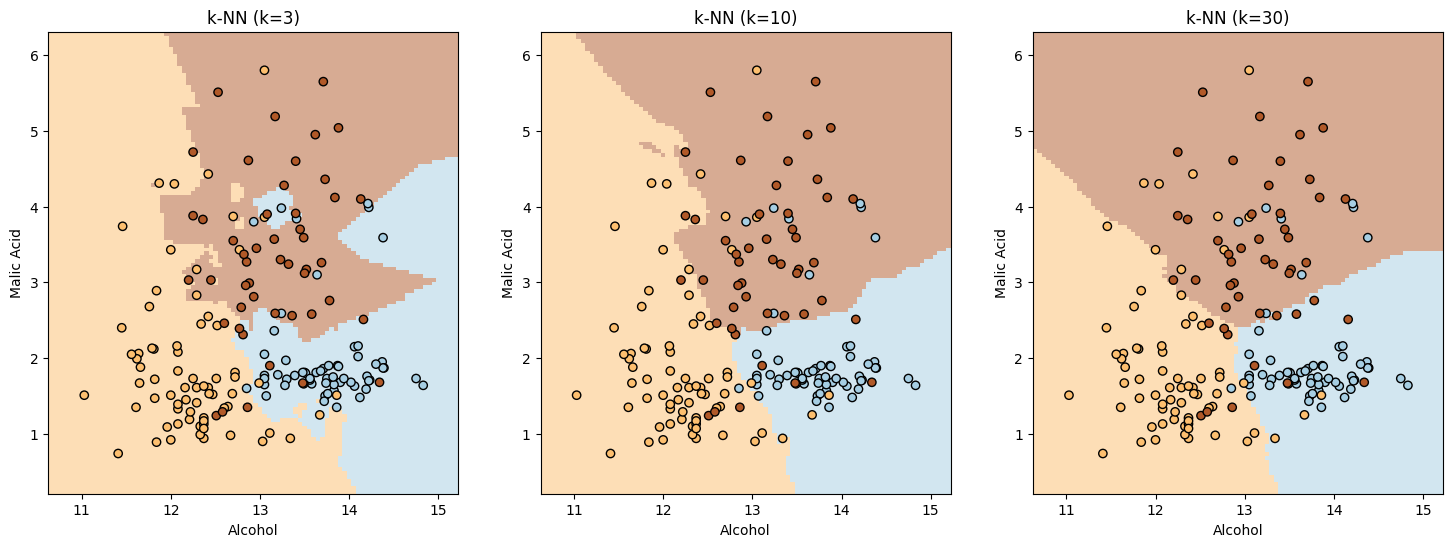

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.pcolormesh(x1x, x2x, y_hat_knn3.reshape(x1x.shape), cmap=plt.cm.Paired, alpha=0.5)
ax1.scatter(X_full['alcohol'], X_full['malic_acid'], c=y, edgecolors='k', cmap=plt.cm.Paired)
ax1.set_title("k-NN (k=3)")
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Malic Acid")

ax2.pcolormesh(x1x, x2x, y_hat_knn10.reshape(x1x.shape), cmap=plt.cm.Paired, alpha=0.5)
ax2.scatter(X_full['alcohol'], X_full['malic_acid'], c=y, edgecolors='k', cmap=plt.cm.Paired)
ax2.set_title("k-NN (k=10)")
ax2.set_xlabel("Alcohol")
ax2.set_ylabel("Malic Acid")

ax3.pcolormesh(x1x, x2x, y_hat_knn30.reshape(x1x.shape), cmap=plt.cm.Paired, alpha=0.5)
ax3.scatter(X_full['alcohol'], X_full['malic_acid'], c=y, edgecolors='k', cmap=plt.cm.Paired)
ax3.set_title("k-NN (k=30)")
ax3.set_xlabel("Alcohol")
ax3.set_ylabel("Malic Acid")

plt.show()

The k-NN model with k=3 is likely to be overfit as it captures more noise and fluctuations in the training data. The k-NN model with k=30 is likely to be underfit as it smooths out the decision boundary too much. The k-NN model with k=10 provides a balance between the two.

**Q10** How could you visualize the classification boundary for any of these models if there was a single predictor?  What if there were more than 2 predictors?

If there was a single predictor, you could visualize the classification boundary by plotting the predictor on the x-axis and the predicted class on the y-axis. If there were more than 2 predictors, you could use dimensionality reduction techniques such as PCA to reduce the number of predictors to 2 and then visualize the classification boundary in the reduced space.